# Health Data Science Portfoilio - Lung Cancer Data

### Rohan Patel 
### PUBH 1142
### Professsor Klopper

## <span style="color:Purple">Introduction

In [189]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns


#### To start I will be importing the data into this notebook. For my final project, I had decided to pick a data set which shows the lung cancer rates and the reason why I chose this specific is because I wanted to see the correlation between city, cases, and age. The data set which I have selected came from Professor Klopper's tutorials repository where I had found the data. 


## <span style="color:purple">Data import and printing

In [190]:
# Import the data into a pandas DataFrame
df=pd.read_csv('https://raw.githubusercontent.com/juanklopper/TutorialData/main/lung_cancer_data.csv')

In [191]:
type(df)


pandas.core.frame.DataFrame

In [192]:
# Printing the data frame
df

,age,age_midpt,city,cases,population
0,40-54,47,Fredericia,11,3059
1,55-59,57,Fredericia,11,800
2,60-64,62,Fredericia,11,710
3,65-69,67,Fredericia,10,581
4,70-74,72,Fredericia,11,509
5,75<=,75,Fredericia,10,605
6,40-54,47,Horsens,13,2879
7,55-59,57,Horsens,6,1083
8,60-64,62,Horsens,15,923
9,65-69,67,Horsens,10,834


In [193]:
# Identify the columns in the data frame as a way to seperate categorical variables
df.columns

Index(['age', 'age_midpt', 'city', 'cases', 'population'], dtype='object')

In [194]:
df.head()

,age,age_midpt,city,cases,population
0,40-54,47,Fredericia,11,3059
1,55-59,57,Fredericia,11,800
2,60-64,62,Fredericia,11,710
3,65-69,67,Fredericia,10,581
4,70-74,72,Fredericia,11,509


#### Now we are able to see the full data that was imported from github. This shows us all the cases of lung cancer across different cities in Denmark. Each data point shows us the amount of cases based on age, the age midpoint, city, cases, and population. What I want to do in this case is understand the different rates of lung cancer across different cities in Denmark while taking age into account. I will next seperate and group the data based on city. I will also find the summarry statistics when comparing city and cases as well as age and number of cases.

## <span style="color:purple">Grouping and Summary Statistics

In [195]:
grouped = df.groupby('city')

In [196]:
print(grouped)

In [197]:
mean_values = grouped.mean('cases')


In [198]:
print(mean_values)

            age_midpt      cases   population
city                                         
Fredericia  63.333333  10.666667  1044.000000
Horsens     63.333333   9.666667  1189.166667
Kolding     63.333333   8.500000  1163.833333
Vejle       63.333333   8.500000  1004.333333


In [199]:
# Calculate the mean of the cases for each city
grouped = df.groupby('city')['cases']
summary_statistics = grouped.describe()
print(summary_statistics)

            count       mean       std   min    25%   50%    75%   max
city                                                                  
Fredericia    6.0  10.666667  0.516398  10.0  10.25  11.0  11.00  11.0
Horsens       6.0   9.666667  4.844241   2.0   7.00  11.0  12.75  15.0
Kolding       6.0   8.500000  2.880972   4.0   7.25   8.5  10.50  12.0
Vejle         6.0   8.500000  3.146427   5.0   7.00   7.5   9.50  14.0


In [200]:
# Calculate the mean of the cases column for each age group
grouped = df.groupby('age')['cases']
summary_statistics = grouped.describe()
print(summary_statistics)

       count   mean       std   min    25%   50%    75%   max
age                                                          
40-54    4.0   8.25  4.425306   4.0   4.75   8.0  11.50  13.0
55-59    4.0   8.00  2.160247   6.0   6.75   7.5   8.75  11.0
60-64    4.0  10.75  3.304038   7.0   9.25  10.5  12.00  15.0
65-69    4.0  11.25  1.892969  10.0  10.00  10.5  11.75  14.0
70-74    4.0  10.00  1.825742   8.0   8.75  10.0  11.25  12.0
75<=     4.0   7.75  4.349329   2.0   5.75   8.5  10.50  12.0


#### Based on the grouping, we can see that Federicia has the highest overall mean of cases. However, when taking age into consideration, it is interesting to see that there were the highest mean number of cases in the 65-69 age group. The standard deviation also varied heavily based on the different city and age group. It was intersting to note that the 70-74 age range had the lowest standard deviation as well as having the smallest range. Compared to the 40-54 age group, the range was the second highest while noting that they had the highest standard deviation. When looking at the data based on city, it was interesting to see that Fredericia had the highest mean amount of cases and the lowest standard deviation. However, Kolding had the lowest stansard deviation and had the lowest mean. SInce this data has a lot of variables to take into account, I want to create a scatterplot to show that the lung cancer cases by city and age.

## <span style="color:purple">Scatterplot Analysis

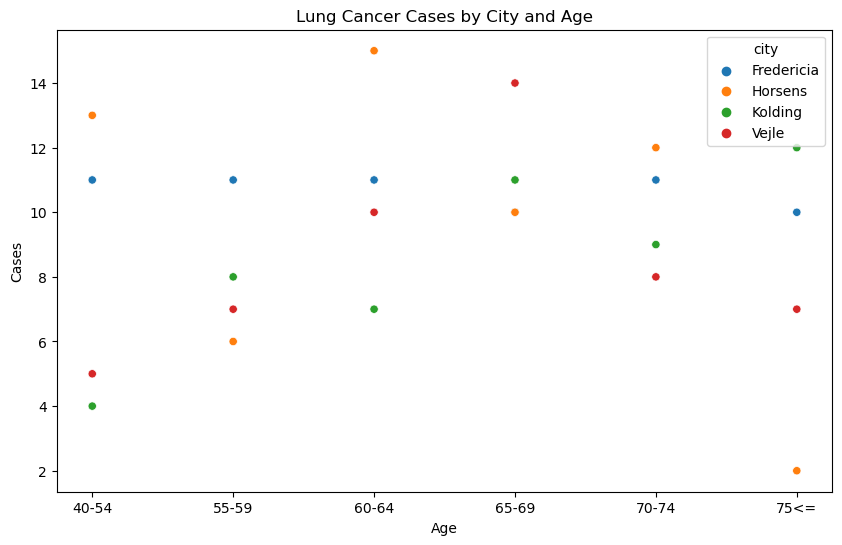

In [201]:
# Creating the scatterplot of lung cancer cases by age while taking city into account
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cases', hue='city', data=df)
plt.title('Lung Cancer Cases by City and Age')
plt.xlabel('Age')
plt.ylabel('Cases')
plt.show()

###### <span style="color:yellow">Note - Fredericia has 10 cases in age group 65-69

#### Based on the scatterplot, we can see the trends in a visual manner. When analyzing this scatterplot, it is clear to tell that overall, cases in the age groups 40-54 and 75<= varied heavily. It wass interesting as the cases in the 40-54 were the highest in Horsens with 13 cases and the lowest in Kolding with 4 cases. However, in the 75<= age group, the cases were highest in Kolding with 12 but lowest in Horsense with 2. It is also clear to see that Fredericia had the highest mean as cases were always between 10-12 no mattter the age group showing little variance. In this sense, there was a lot of difference in the number of cases depending on age and city. Overall, the plot does show the same trends that the data chart displays. 

## <span style="color:purple">Conclusion

#### Overall, the data provided a good analysis for me to figure out the connection between age, city, and lung cancer cases in Denmark. The summarry statistics displayed an outline that each city showed different amount of cases depending on age group. I believe however, that more data does need to be collected in order to uderstand the different rates of lung cancer in each city. Why is it that the lung cancer cases in Fredericia are consistent and not different by age when compared to the rest of the other cities? There are definitely more factors involved in order to get a full understanding of the lung cancer data. A further study could look at the health conditions within each town and ananlyze the cases of lung cancer individually rather then collecting data points.